In [1]:
# Numpy is the main package for scientific computing with Python. 
import numpy as np
import cv2

# Matplotlib is a useful plotting library for python 
import matplotlib.pyplot as plt
# This code is to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots, can be changed
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
def draw_outline(ref, query, model):
    """
        Draw outline of reference image in the query image.
        This is just an example to show the steps involved.
        You can modify to suit your needs.
        Inputs:
            ref: reference image
            query: query image
            model: estimated transformation from query to reference image
    """
    h,w = ref.shape[:2]
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,model)
    
    img = query.copy()
    img = cv2.polylines(img,[np.int32(dst)],True,255,3, cv2.LINE_AA)
    plt.imshow(img, 'gray'), plt.show()

def draw_inliers(img1, img2, kp1, kp2, matches, matchesMask):
    """
        Draw inlier between images
        img1 / img2: reference/query  img
        kp1 / kp2: their keypoints
        matches : list of (good) matches after ratio test
        matchesMask: Inlier mask returned in cv2.findHomography() 
    """
    matchesMask = matchesMask.ravel().tolist()
    draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                    singlePointColor = None,
                    matchesMask = matchesMask, # draw only inliers
                    flags = 2)
    img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches,None,**draw_params)
    plt.imshow(img3, 'gray'),plt.show()


# Question 1: Matching an object in a pair of images (60%)

In [3]:
# load images as grey scale
img1 = cv2.imread('book_covers/Reference/049.jpg', 0)
if not np.shape(img1):
  # Error message and print current working dir
  print("Could not load img1. Check the path, filename and current working directory\n")
  !pwd
img2 = cv2.imread("book_covers/Query/049.jpg", 0)
if not np.shape(img2):
  # Error message and print current working dir
  print("Could not load img2. Check the path, filename and current working directory\n")
  !pwd

# load images as grey scale
img3 = cv2.imread('book_covers/Reference/045.jpg', 0)
if not np.shape(img3):
  # Error message and print current working dir
  print("Could not load img3. Check the path, filename and current working directory\n")
  !pwd
img4 = cv2.imread("book_covers/Query/045.jpg", 0)
if not np.shape(img4):
  # Error message and print current working dir
  print("Could not load img4. Check the path, filename and current working directory\n")
  !pwd

# load images as grey scale
img5 = cv2.imread('landmarks/Reference/054.jpg', 0)
if not np.shape(img5):
  # Error message and print current working dir
  print("Could not load img5. Check the path, filename and current working directory\n")
  !pwd
img6 = cv2.imread("landmarks/Query/054.jpg", 0)
if not np.shape(img6):
  # Error message and print current working dir
  print("Could not load img6. Check the path, filename and current working directory\n")
  !pwd

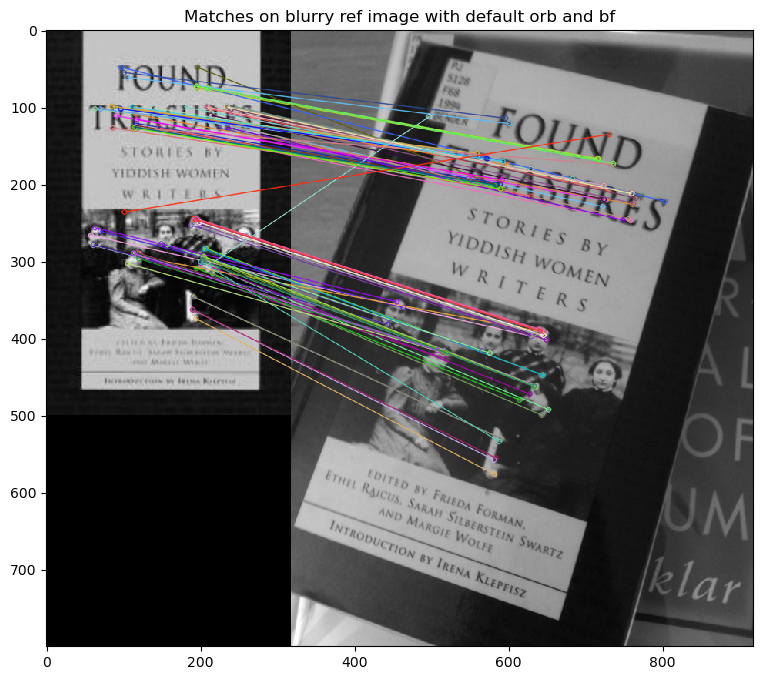

kp for reference:  500
kp for query:  500
good matches:  101


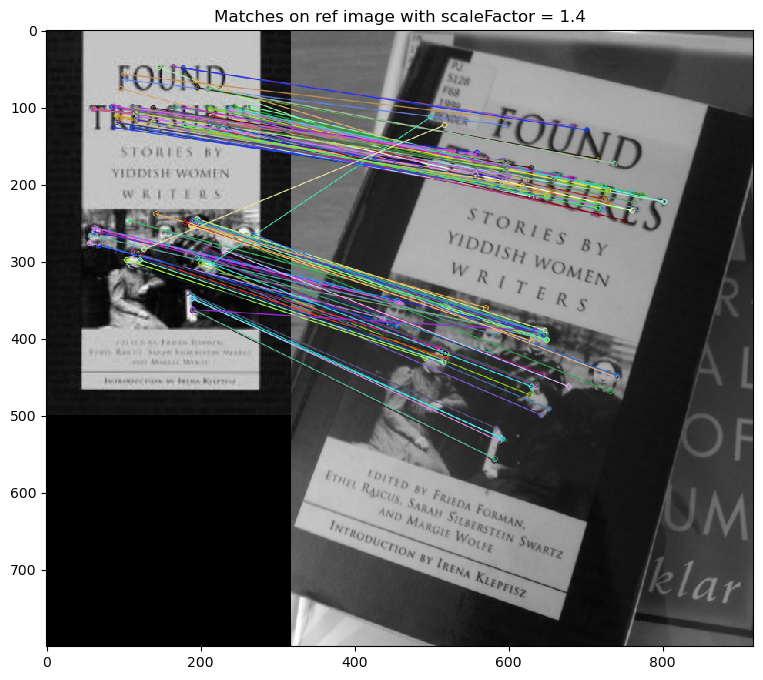

kp for reference:  436
kp for query:  484
good matches:  124


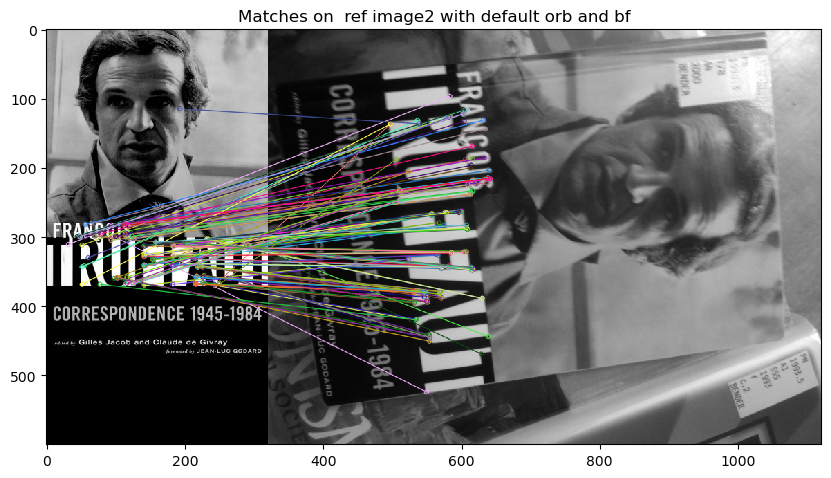

kp for reference:  500
kp for query:  500
good matches:  139


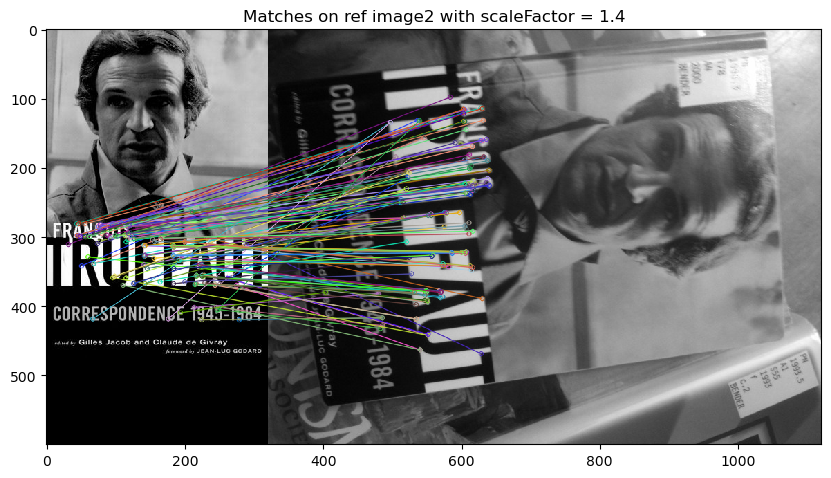

kp for reference:  436
kp for query:  484
good matches:  124


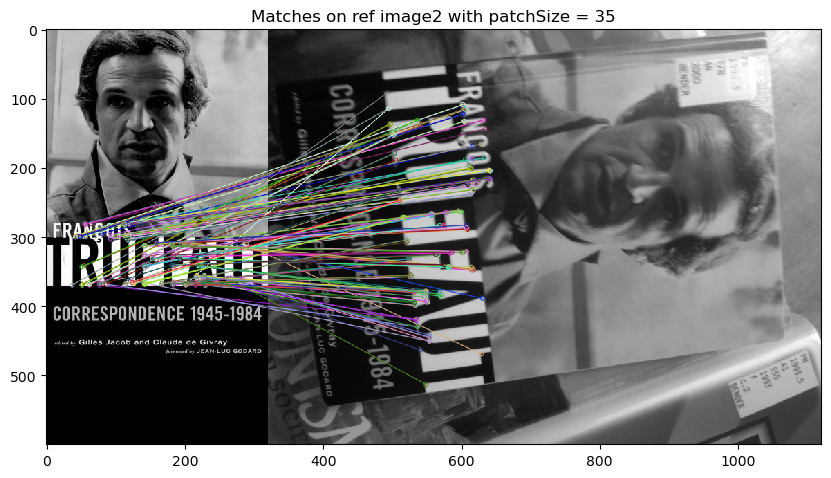

kp for reference:  500
kp for query:  500
good matches:  149


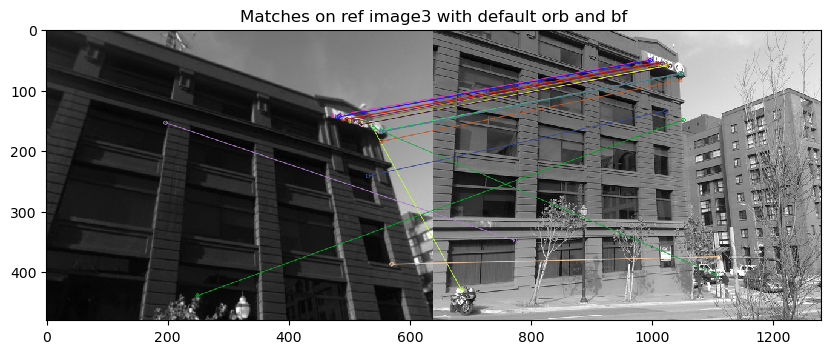

kp for reference:  500
kp for query:  500
good matches:  24


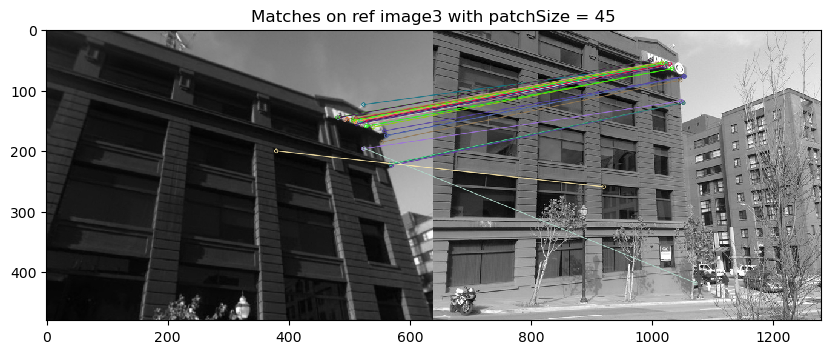

kp for reference:  500
kp for query:  500
good matches:  33


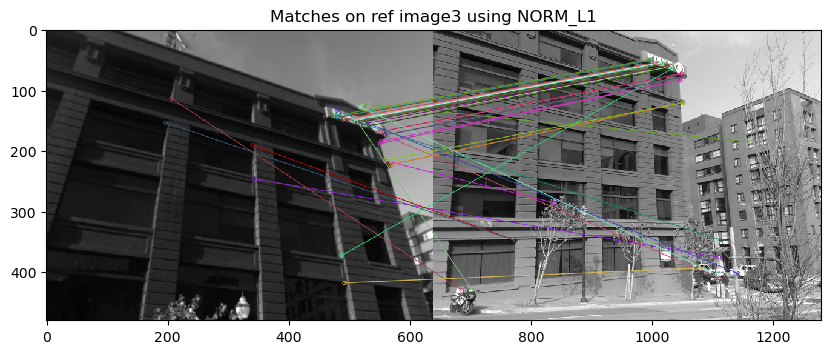

kp for reference:  500
kp for query:  500
good matches:  40


In [4]:
def matchImage(image1, image2, orb, bf, ratio, message):
    # find the keypoints and descriptors with ORB, see (2) above
    kp1, des1 = orb.detectAndCompute(image1, None)
    kp2, des2 = orb.detectAndCompute(image2, None)

    # draw keypoints, see (2) above
    img_kp1 = cv2.drawKeypoints(image1, kp1, None, color=(173, 216, 230))
    img_kp2 = cv2.drawKeypoints(image2, kp2, None, color=(173, 216, 230))

    # Match descriptors, see (3) above
    matches = bf.knnMatch(des1, des2, k=2)

    # Apply ratio test, see (3) above
    good = []
    for m, n in matches:
        if m.distance < ratio*n.distance:
            good.append(m)

    # draw matches, see (4) above
    matches = cv2.drawMatches(image1, kp1, image2, kp2, good, None, flags=2)
    
    plt.imshow(matches)
    plt.title(message)
    plt.show()
    
    print("kp for reference: ", len(kp1))
    print("kp for query: ", len(kp2))
    print("good matches: ", len(good))
    return 
    
orb = cv2.ORB_create()
bf = cv2.BFMatcher(cv2.NORM_HAMMING)
matchImage(img1, img2, orb, bf, 0.8, "Matches on blurry ref image with default orb and bf")

orb = cv2.ORB_create(scaleFactor = 1.4)
bf = cv2.BFMatcher(cv2.NORM_HAMMING)
matchImage(img1, img2, orb, bf, 0.8, "Matches on ref image with scaleFactor = 1.4")

orb = cv2.ORB_create()
bf = cv2.BFMatcher(cv2.NORM_HAMMING)
matchImage(img3, img4, orb, bf, 0.8, "Matches on  ref image2 with default orb and bf")

orb = cv2.ORB_create(scaleFactor = 1.4)
bf = cv2.BFMatcher(cv2.NORM_HAMMING)
matchImage(img3, img4, orb, bf, 0.8, "Matches on ref image2 with scaleFactor = 1.4")

orb = cv2.ORB_create(patchSize = 35)
bf = cv2.BFMatcher(cv2.NORM_HAMMING)
matchImage(img3, img4, orb, bf, 0.8, "Matches on ref image2 with patchSize = 35")

orb = cv2.ORB_create()
bf = cv2.BFMatcher(cv2.NORM_HAMMING2)
matchImage(img5, img6, orb, bf, 0.80, "Matches on ref image3 with default orb and bf")

orb = cv2.ORB_create(patchSize = 45)
bf = cv2.BFMatcher(cv2.NORM_HAMMING2)
matchImage(img5, img6, orb, bf, 0.80, "Matches on ref image3 with patchSize = 45")

orb = cv2.ORB_create()
bf = cv2.BFMatcher(cv2.NORM_L1)
matchImage(img5, img6, orb, bf, 0.80, "Matches on ref image3 using NORM_L1")



In the first image, all defaults are used in the image to set a baseline. The amount of good matches for this is 101. When observing the reference image, it seems to be more blurry and there are only really good defined lines in the title "Found treasures" and then obviously the features on the image. However, since it was a relatively blurry image I increased the scaleFactor to 1.4. This decreased the keypoints on both the reference and query images from 500 to 436 and 484 respectively, however the good matches increased to 124. As the image becomes more blurry, fine details are lost in the reference image, so increasing the scale factor allows the algorithm to become more sensitive to larger scale features.

Next, on image 2, we have another book. For a baseline, all defaults are used. We have kp for reference and query as 500, and 139 good matches. As comparison for the last image, the scalefactor was increased to 1.4 again but in this scenario the good matches decreased by 15. This shows that with a better image, the scale factor increase is not beneficial. Another parameter was changed instead, this time, patchSize was changed to 35 which increased the matches from baseline by 10. Increasing the patch size allows the algorithm to consider a larger context around the keypoints allowing it to capture more destinct features, which are pominant in the title of this book. 

Finally, on image 3, we have two photos of a building. On baseline, we only have 24 good matches upon which we can see that 4 are false positives. Again, I increased the patchSize to 35 which increased the good matches to 33, upon which we can see only 2 are false positives. Increasing the patch size allowed the algorithm to find more matches upon the "sign" on the top right of the building. Next, I used NORM_L1 as a distance metric. It increased the good matches again to 40, however also more false positives. This is likely since norm_l1 is less sensitive to small changes in descriptor values compared to norm_hamming. So while it might identify more true matches, it can also result in higher rate of false matches 

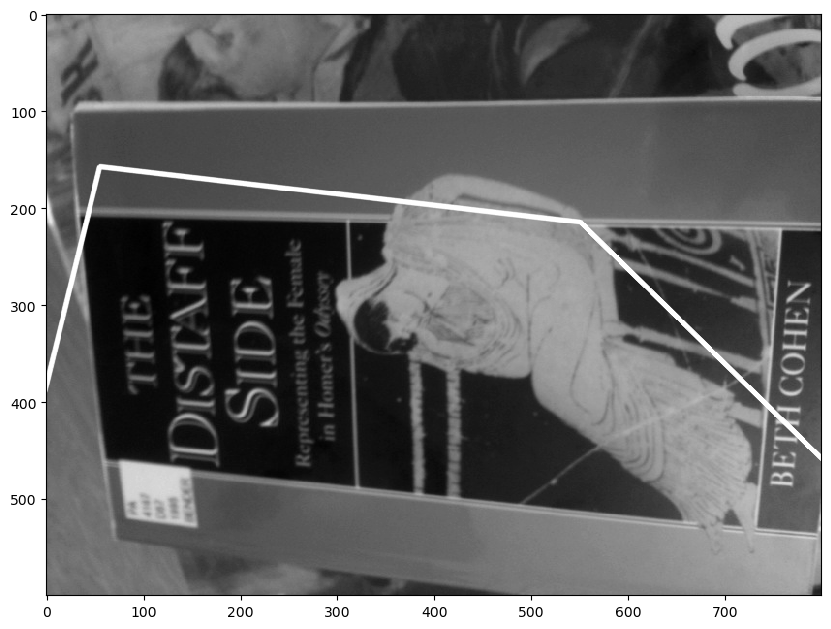

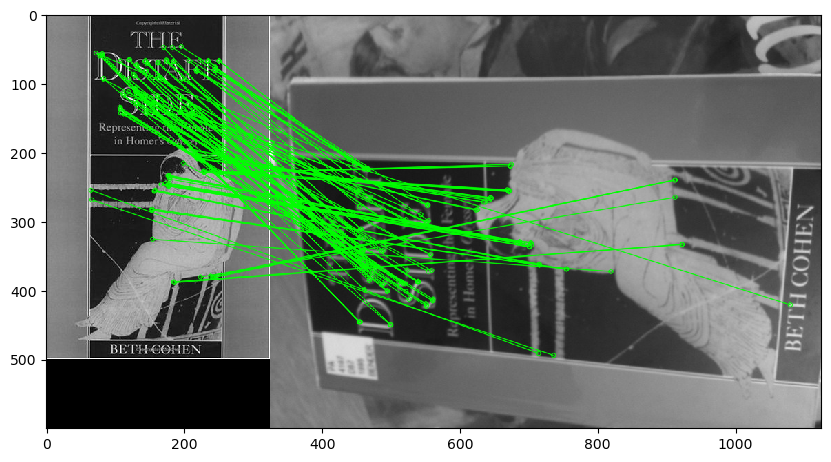

In [5]:
img1 = cv2.imread('book_covers/Reference/001.jpg', 0)
img2 = cv2.imread('book_covers/Query/001.jpg', 0)

orb = cv2.ORB_create()
bf = cv2.BFMatcher(cv2.NORM_HAMMING)

kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

matches = bf.knnMatch(des1, des2, k=2)

good = []
for m, n in matches:
    if m.distance < 0.8*n.distance:
        good.append(m)

# Create src_pts and dst_pts as float arrays to be passed into cv2.,findHomography
src_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1,1,2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1,1,2)

# using cv2 standard method, see (3) above
M, mask = cv2.findHomography(src_pts, dst_pts, 0)

# draw frame
draw_outline(img1, img2, M)

# draw inliers
draw_inliers(img1, img2, kp1, kp2, good, mask)

Visually, we can see that the homography did not match with the book cover. It is clear that it is basing it on the matches, not the cover of the book and does not take into consideration the perspective. The perspective distortion and changes in viewpoint between the two images is likely the cause for this error, since homography transformation assumes the scene is planar.

Try the RANSAC option to compute homography. Change the RANSAC parameters, and explain your results. Print and analyze the inlier numbers.

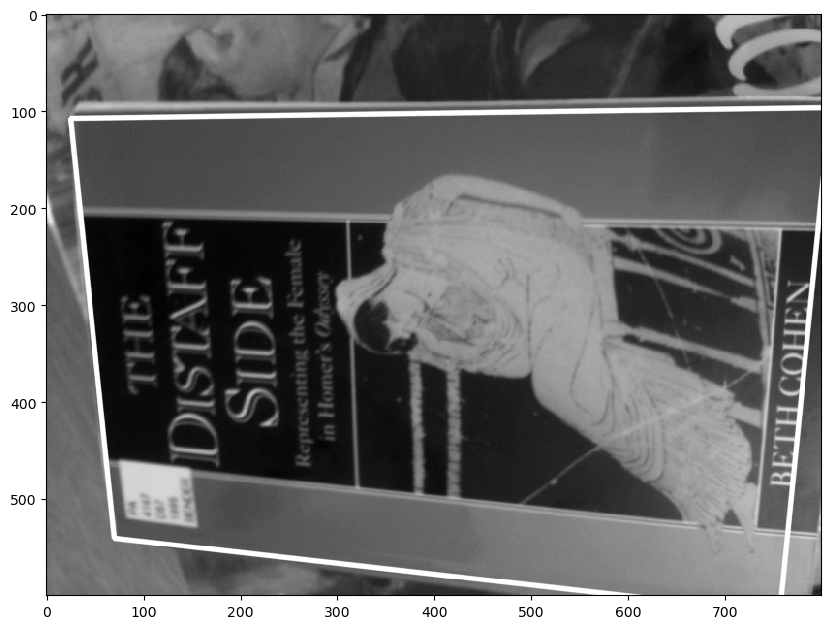

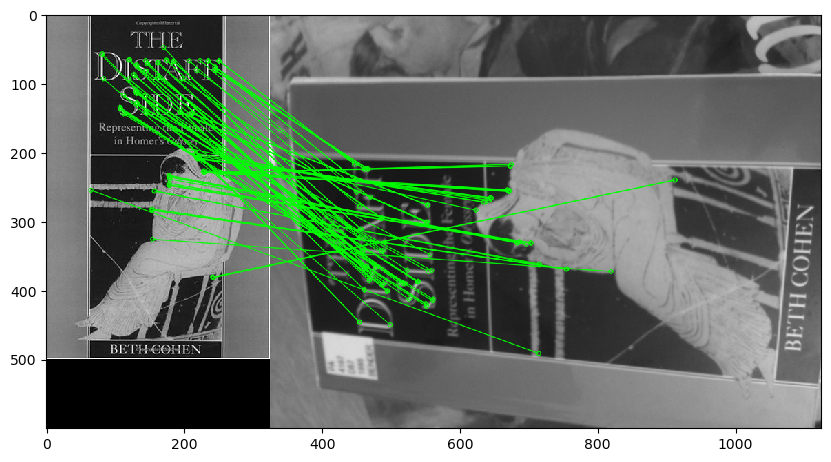

inlier with no parameter change :  94
inlier with ransacReprojThreshold = 5 :  100
inlier with confidence = 0.8 :  94


In [6]:
# Your code to display book location after RANSAC here

# using RANSAC
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC)

M2, mask2 = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, ransacReprojThreshold=5)

M3, mask3 = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, confidence=0.8)


# draw frame
draw_outline(img1, img2, M)

# draw inliers
draw_inliers(img1, img2, kp1, kp2, good, mask3)

# inlier number
inlier1 = np.sum(mask)
print("inlier with no parameter change : ", inlier1)

inlier2 = np.sum(mask2)
print("inlier with ransacReprojThreshold = 5 : ", inlier2)

inlier3 = np.sum(mask3)
print("inlier with confidence = 0.8 : ", inlier3)



Using RANSAC to compute the homography sees a big change in the accuracy. It accurately performs a transformation onto the book. There were 3 cases for the RANSAC parameters. First one was a baseline with no paramater change, which found 94 inliers. 

Then, I changed ransacReprojThreshold = 5 which increased the inliers to 100. This would be because increasing the ransacReprojThreshold increases the allowed reprojection error threshold which increases the number of inliers. While this gives more inliers, this could lead to increased false positives given the threshold is set too high.

Next, I set the confidence threshold to 0.8. Since the inliers did not change when I did this, it suggests that the original threshold was already appropriately set. If the inliers changed, that would mean that more matches are being considered valid which could potentially mean in better overall matching between the images.

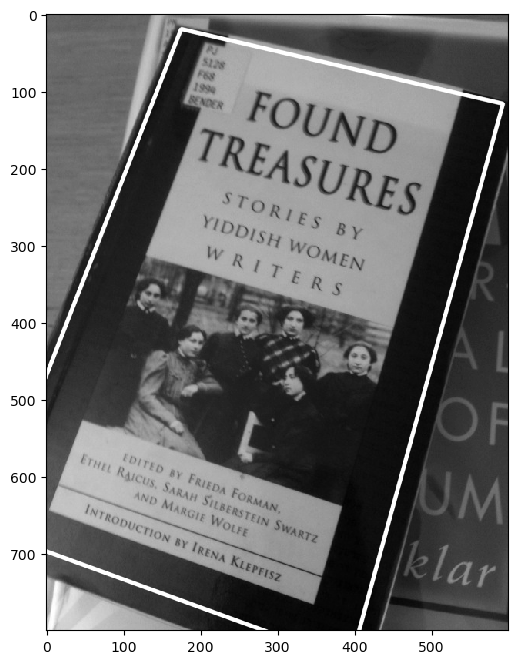

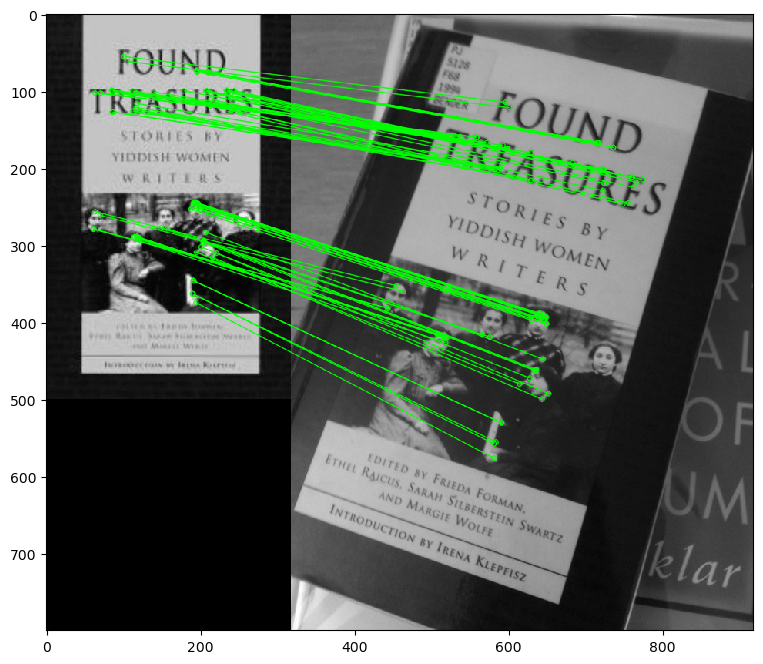

kp for reference:  500
kp for query:  500
inliers:  82


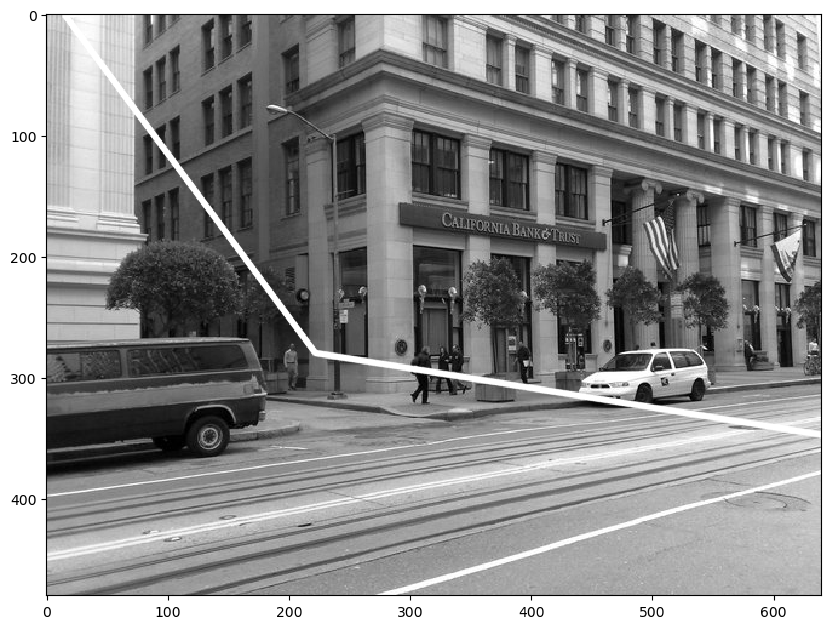

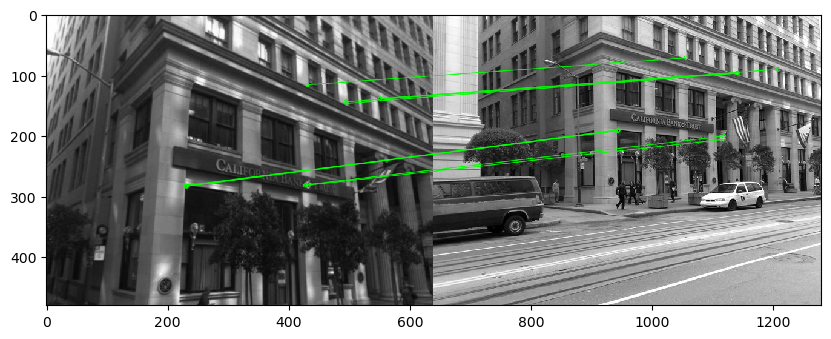

kp for reference:  500
kp for query:  500
inliers:  9


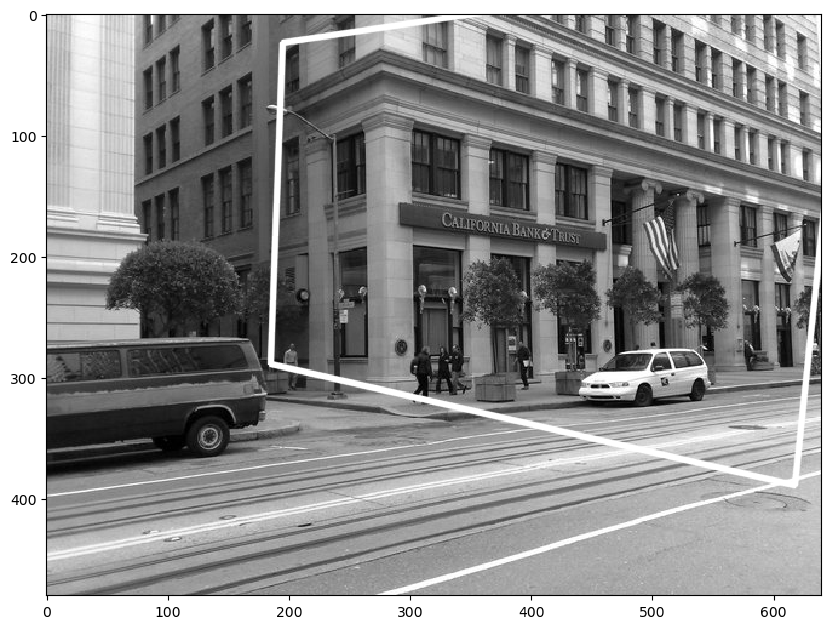

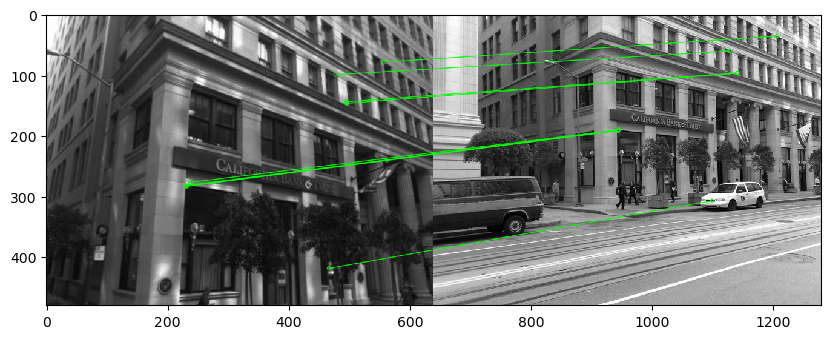

kp for reference:  512
kp for query:  502
inliers:  9


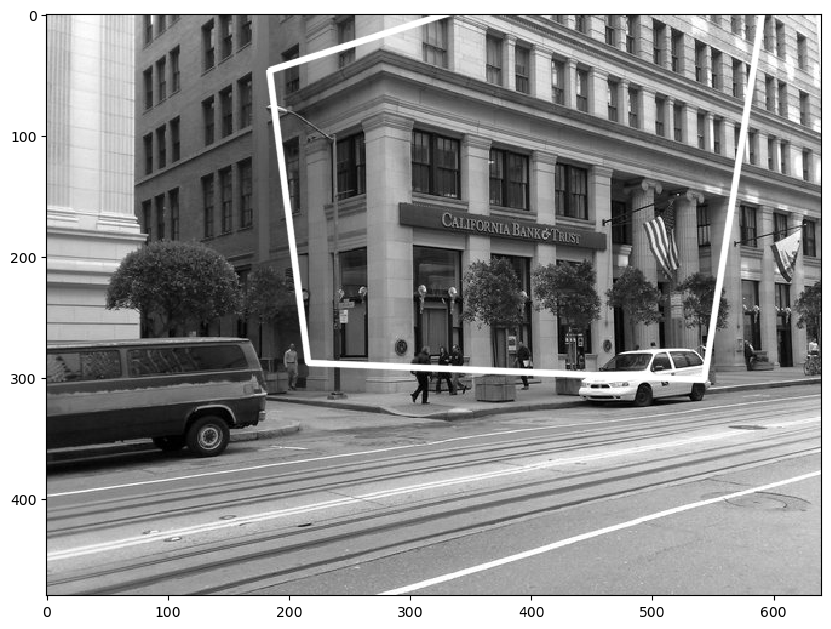

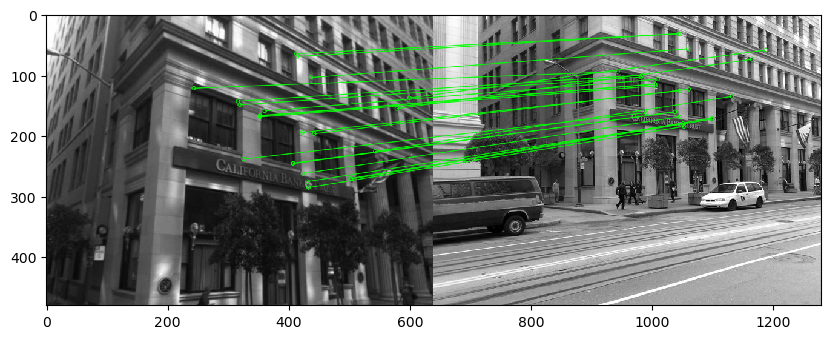

kp for reference:  2046
kp for query:  2038
inliers:  23


In [7]:
def matchImageImproved(img1_path, img2_path, orb, bf, ratio, message, draw):
    img1 = cv2.imread(img1_path, 0)
    img2 = cv2.imread(img2_path, 0)

    # Find the keypoints and descriptors with ORB
    kp1, des1 = orb.detectAndCompute(img1, None)
    kp2, des2 = orb.detectAndCompute(img2, None)

    # If no keypoints or descriptors were found for either image, return 0
    if des1 is None or des2 is None or len(kp1) == 0 or len(kp2) == 0:
        return 0

    # draw keypoints, see (2) above
    img_kp1 = cv2.drawKeypoints(img1, kp1, None, color=(173, 216, 230))
    img_kp2 = cv2.drawKeypoints(img2, kp2, None, color=(173, 216, 230))

    # Match descriptors, see (3) above
    matches = bf.knnMatch(des1, des2, k=2)

    # Apply ratio test, see (3) above
    good = []
    for m, n in matches:
        if m.distance < ratio*n.distance:
            good.append(m)
    if len(good) < 4:
        return 0
    
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, ransacReprojThreshold=5)

    # draw matches, see (4) above
    matches = cv2.drawMatches(img1, kp1, img2, kp2, good, None, flags=2)
    num_inliers = np.sum(mask)
    
    if draw == True:
        # draw frame
        draw_outline(img1, img2, M)

        # draw inliers
        draw_inliers(img1, img2, kp1, kp2, good, mask)
    else:
        return num_inliers
    
    print("kp for reference: ", len(kp1))
    print("kp for query: ", len(kp2))
    print("inliers: ", num_inliers)
    
    return 

img1_path = 'book_covers/Reference/049.jpg'
img2_path = 'book_covers/query/049.jpg'
orb = cv2.ORB_create()
bf = cv2.BFMatcher(cv2.NORM_HAMMING)
matchImageImproved(img1_path, img2_path, orb, bf, 0.8, "Matches on blurry ref image with default orb and bf", draw = True)

img1_path = 'landmarks/reference/011.jpg'
img2_path = 'landmarks/Query/011.jpg'
orb = cv2.ORB_create()
bf = cv2.BFMatcher(cv2.NORM_HAMMING)
matchImageImproved(img1_path, img2_path, orb, bf, 0.8, "Matches on blurry ref image with default orb and bf", draw = True)

img1_path = 'landmarks/reference/011.jpg'
img2_path = 'landmarks/Query/011.jpg'
orb = cv2.ORB_create(scoreType = cv2.ORB_FAST_SCORE)
bf = cv2.BFMatcher(cv2.NORM_HAMMING)
matchImageImproved(img1_path, img2_path, orb, bf, 0.8, "Matches on blurry ref image with default orb and bf", draw = True)

img1_path = 'landmarks/reference/011.jpg'
img2_path = 'landmarks/Query/011.jpg'
orb = cv2.ORB_create(scoreType = cv2.ORB_FAST_SCORE, nfeatures = 2000, patchSize = 30)
bf = cv2.BFMatcher(cv2.NORM_HAMMING)
matchImageImproved(img1_path, img2_path, orb, bf, 0.8, "Matches on blurry ref image with default orb and bf", draw = True)

Success case is the book. This was the easiest to match. RANSAC found a good match around the book cover, and the matches visually appeared to be all true positives. I chose this example because I looked at this one previously, which visually had some false positives, including one that matched the sticker on the query image to something irrelivant. The parameter settings for this was default, but successful.

The failure case is a building. The reference photo is from across the street, where the query image is next to the footpath taken upwards. without any changes, the inliers is 9 and the homography transformation is in the right realm, but inaccurate. To improve that, the paramater scoreType = cv2.ORB_FAST_SCORE was used. This improved the perspective, but the inliers stayed the same. This would be because there are lots of corners in the image. To further refine this, the changes nfeatures = 2000 and patchSize = 30 were performed which narrowed down the homography transformation almost exactly to the perspective of the query. This increased the inliers to 23, which is to be expected when the nfeatures is increased, but they seem to be mostly true positives on inspection.

# Question 2: What am I looking at? (40%)

In [8]:
import os

ref_dir = os.path.abspath('book_covers/Reference')
query_dir = os.path.abspath('book_covers/Query')

ref_files = sorted(os.listdir(ref_dir))[:40]
query_files = sorted(os.listdir(query_dir))[:40]

for query_file in query_files:
    inliersMax = 0
    max_idx = -1 
    query_path = os.path.join(query_dir, query_file)
    for i in range(len(ref_files)):
        ref_file = ref_files[i]
        ref_path = os.path.join(ref_dir, ref_file)
        orb = cv2.ORB_create(nfeatures = 500)
        bf = cv2.BFMatcher(cv2.NORM_HAMMING)
        num_inliers = matchImageImproved(query_path, ref_path, orb, bf, 0.8, "", False)
        if num_inliers > inliersMax and num_inliers > 20:
            # Update closest match
            inliersMax = num_inliers
            max_idx = i
    if max_idx == -1:
        print(f"No match found for {query_file}")
    else:
        ref_file = ref_files[max_idx]
        print(f"Match found, {query_file} and {ref_file} with {inliersMax} inliers.")
    print("--------------------------------------------------")


No match found for .DS_Store
--------------------------------------------------
Match found, 001.jpg and 001.jpg with 105 inliers.
--------------------------------------------------
No match found for 001unrelatedimage.jpg
--------------------------------------------------
Match found, 002.jpg and 002.jpg with 72 inliers.
--------------------------------------------------
No match found for 002unrelatedimage.jpg
--------------------------------------------------
Match found, 003.jpg and 003.jpg with 95 inliers.
--------------------------------------------------
No match found for 003unrelatedimage.jpg
--------------------------------------------------
Match found, 004.jpg and 004.jpg with 26 inliers.
--------------------------------------------------
Match found, 005.jpg and 005.jpg with 45 inliers.
--------------------------------------------------
Match found, 006.jpg and 006.jpg with 83 inliers.
--------------------------------------------------
Match found, 007.jpg and 007.jpg with

What my code does is it matches the reference images to the query images by iterating overy the query image files and comparing them to the reference images using the matchImageImproved function to find the inliers. It then works out the image with the most inliers, and has a threshold of must having 20 inliers to pass. Overall accuracy for this function is 36/39 (92%), which is good. The only three matches it did not find were on image 18, 33 and 37, which must have matches under the threshold of 20 inliers. 
Upon individual analysis of those images, image 18 has mild glare and the image is slightly washed, the distinctive features are only the text. Image 33's image only has significant contrast from the picture and the background, which may decrease inliners and finally image 37 appears to be blurry. 

Running the program with no threshold, 18 got a match with 18 with inliners = 18. However 33 matched with 6 then 12, and 37 matched with 3 then 15. Running a top k accuracy measure might have a small impact in this dataset, as it would have allowed a match with 18. However, there would be false positives with img 33 and 37.

Incomplete.

In [12]:
import os

ref_dir = os.path.abspath('book_covers/Reference')
query_dir = os.path.abspath('book_covers/Query')

ref_files = sorted(os.listdir(ref_dir))[:40]
query_files = sorted(os.listdir(query_dir))[:40]

for query_file in query_files:
    inliersMax = 0
    max_idx = -1 
    query_path = os.path.join(query_dir, query_file)
    for i in range(len(ref_files)):
        ref_file = ref_files[i]
        ref_path = os.path.join(ref_dir, ref_file)
        orb = cv2.ORB_create(nfeatures = 500)
        bf = cv2.BFMatcher(cv2.NORM_HAMMING)
        num_inliers = matchImageImproved(query_path, ref_path, orb, bf, 0.8, "", False)
        if num_inliers > inliersMax and num_inliers > 20:
            # Update closest match
            inliersMax = num_inliers
            max_idx = i
    if max_idx == -1:
        print(f"No match found for {query_file}")
    else:
        ref_file = ref_files[max_idx]
        print(f"Match found, {query_file} and {ref_file} with {inliersMax} inliers.")
        print("--------------------------------------------------")


No match found for .DS_Store
Match found, 001.jpg and 001.jpg with 105 inliers.
--------------------------------------------------
No match found for 001unrelatedimage.jpg
Match found, 002.jpg and 002.jpg with 72 inliers.
--------------------------------------------------
No match found for 002unrelatedimage.jpg
Match found, 003.jpg and 003.jpg with 95 inliers.
--------------------------------------------------
No match found for 003unrelatedimage.jpg
Match found, 004.jpg and 004.jpg with 26 inliers.
--------------------------------------------------
Match found, 005.jpg and 005.jpg with 45 inliers.
--------------------------------------------------
Match found, 006.jpg and 006.jpg with 83 inliers.
--------------------------------------------------
Match found, 007.jpg and 007.jpg with 46 inliers.
--------------------------------------------------
Match found, 008.jpg and 008.jpg with 26 inliers.
--------------------------------------------------
Match found, 009.jpg and 009.jpg with 7

I put 3 "phony" images in, 001unrelatedimage.jpg, 002unrelatedimage.jpg and 003unrelatedimage.jpg. Accuracy slightly increases to 37/39 (95%) since the phony images made it so the function misses the image that did not match. No changes were made to improve performance, this functionality was built in from previous step.

In [10]:
import os

ref_dir = os.path.abspath('museum_paintings/Reference')
query_dir = os.path.abspath('museum_paintings/Query')

ref_files = sorted(os.listdir(ref_dir))[:40]
query_files = sorted(os.listdir(query_dir))[:40]

for query_file in query_files:
    inliersMax = 0
    max_idx = -1 
    query_path = os.path.join(query_dir, query_file)
    for i in range(len(ref_files)):
        ref_file = ref_files[i]
        ref_path = os.path.join(ref_dir, ref_file)
        orb = cv2.ORB_create(nfeatures = 1000, scaleFactor=1.4)
        bf = cv2.BFMatcher(cv2.NORM_HAMMING)
        num_inliers = matchImageImproved(query_path, ref_path, orb, bf, 0.8, "", False)
        if num_inliers > inliersMax and num_inliers > 20:
            # Update closest match
            inliersMax = num_inliers
            max_idx = i
    if max_idx == -1:
        print(f"No match found for {query_file}")
    else:
        ref_file = ref_files[max_idx]
        print(f"Match found, {query_file} and {ref_file} with {inliersMax} inliers.")
    print("--------------------------------------------------")


Match found, 001.jpg and 001.jpg with 116 inliers.
--------------------------------------------------
No match found for 001sunflower.jpg
--------------------------------------------------
No match found for 002.jpg
--------------------------------------------------
No match found for 002dudewithhat.jpg
--------------------------------------------------
Match found, 003.jpg and 003.jpg with 55 inliers.
--------------------------------------------------
No match found for 003scarf.jpg
--------------------------------------------------
Match found, 004.jpg and 004.jpg with 26 inliers.
--------------------------------------------------
No match found for 005.jpg
--------------------------------------------------
Match found, 006.jpg and 006.jpg with 72 inliers.
--------------------------------------------------
Match found, 007.jpg and 007.jpg with 128 inliers.
--------------------------------------------------
Match found, 008.jpg and 008.jpg with 219 inliers.
---------------------------

For this, the museum_paintings folder was chosen and 3 images were put in, 001sunflower.jpg, 002dudewithhat.jpg and 003scarf.jpg. The accuracy for this was significantly lower than the book covers, being 22/40 (55%). All the phony images were correctly found, so of the images that had a reference photo, 20/40 (50%) were correctly identified. 2 of the images had false matches with enough inliers to pass through the threshold.

In [11]:
for query_file in query_files:
    inliersMax = 0
    max_idx = -1 
    query_path = os.path.join(query_dir, query_file)
    for i in range(len(ref_files)):
        ref_file = ref_files[i]
        ref_path = os.path.join(ref_dir, ref_file)
        orb = cv2.ORB_create(nfeatures = 1000, scaleFactor=1.4)
        bf = cv2.BFMatcher(cv2.NORM_HAMMING)
        num_inliers = matchImageImproved(query_path, ref_path, orb, bf, 0.8, "", False)
        if num_inliers > inliersMax and num_inliers > 20:
            # Update closest match
            inliersMax = num_inliers
            max_idx = i
    if max_idx == -1:
        print(f"No match found for {query_file}")
    else:
        ref_file = ref_files[max_idx]
        print(f"Match found, {query_file} and {ref_file} with {inliersMax} inliers.")
    print("--------------------------------------------------")

Match found, 001.jpg and 001.jpg with 116 inliers.
--------------------------------------------------
No match found for 001sunflower.jpg
--------------------------------------------------
No match found for 002.jpg
--------------------------------------------------
No match found for 002dudewithhat.jpg
--------------------------------------------------
Match found, 003.jpg and 003.jpg with 55 inliers.
--------------------------------------------------
No match found for 003scarf.jpg
--------------------------------------------------
Match found, 004.jpg and 004.jpg with 26 inliers.
--------------------------------------------------
No match found for 005.jpg
--------------------------------------------------
Match found, 006.jpg and 006.jpg with 72 inliers.
--------------------------------------------------
Match found, 007.jpg and 007.jpg with 128 inliers.
--------------------------------------------------
Match found, 008.jpg and 008.jpg with 219 inliers.
---------------------------

To improve on this problem, I analysed individual images to see that the features might be missed by blurs. To improve the performance, i increased the feature numbers and also changed the scalefactor to 1.4. This would allow there to be more points to be matched, reduce the impact of the blurs by focusing on bigger feature areas, and also allow more images through the filter. This was successful, as there were now no false positives, and the accuracy was 27/40 (67%) which is a big increase overall. 